# Decision Trees

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, miny=0.5, maxy=0.9, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(miny-0.01, maxy+0.01)
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)  


data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
# data = data.sort_values('id', ascending=True)
# data = data.drop_duplicates(subset='id', keep='last')
# data = data.groupby('id').mean().reset_index()

In [11]:
X = data.drop(columns=['class'])
y = data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

data.shape

(756, 755)

<Figure size 432x288 with 0 Axes>

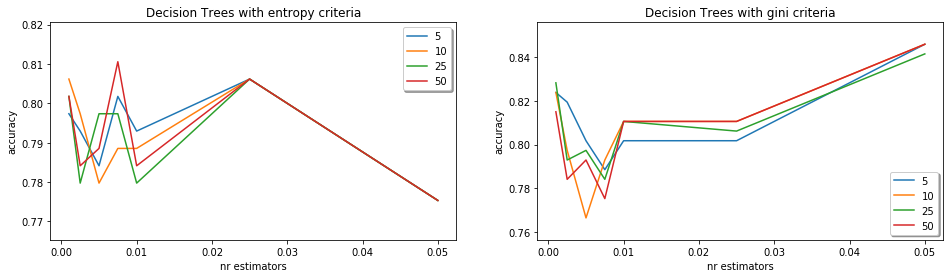

In [12]:
min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:   
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f)
            tree.fit(X_train,y_train)
            y_predict = tree.predict(X_test)
            yvalues.append(accuracy_score(y_test, y_predict))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], min_samples_leaf, values, 'Decision Trees with %s criteria'%f, 
                         'nr estimators', 'accuracy', miny, maxy, percentage=True)    
plt.show()

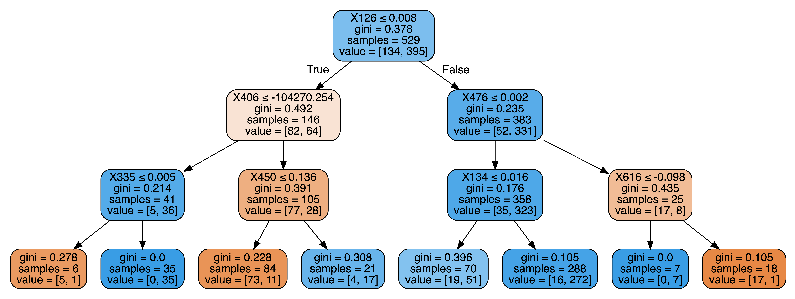

In [13]:
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)  
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()